In [1]:
#Importing modules, tools, etc.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols

#importing main dataframe as df
df = pd.read_csv('data/kc_house_data.csv')

In [2]:
#Converting grade column to an int value

#Create a dummy list
grade_num = []

#Go through each row, grabbing the first index off the string, conver to int
for index, row in df.iterrows():
    grade_num.append(int((str(row['grade'])[0:2])))

#drop the old column and add the new
df['grade_num'] = grade_num
df.drop('grade', axis = 1)

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ... sqft_above  sqft_basement  \
0          5650     1.0        NaN  NONE  ...       1180            0.0   
1          7242     2.0         NO  NONE  ...       2170          400.0   
2         10000     1.0         NO  NONE  ...        770            0.0   
3          5000     1.0         NO  NONE  ...       1050          910.0   
4          8080     1.0         NO  NONE  ...       1680            0.0   
...         ...     ...        ...   ...  ...        ...            ...   
21592      1131     3.0         NO  NONE  ...       1530            0.0   
21593      5813     2.0         NO  NONE  ...       2310            0.0   
21594      1350     2.0         NO  NONE  ...       1020            0.0   
21595      2388     2.0        NaN  NONE  ...       1600            0.0   
21596      1076     2.0         NO  NONE  ...       1020            0.0   

      yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0         1955           0.0    98178  47.5112 -122.257           1340   
1         1951        1991.0    98125  47.7210 -122.319           1690   
2         1933           NaN    98028  47.7379 -122.233           2720   
3         1965           0.0    98136  47.5208 -122.393           1360   
4         1987           0.0    98074  47.6168 -122.045           1800   
...        ...           ...      ...      ...      ...            ...   
21592     2009           0.0    98103  47.6993 -122.346           1530   
21593     2014           0.0    98146  47.5107 -122.362           1830   
21594     2009           0.0    98144  47.5944 -122.299           1020   
21595     2004           0.0    98027  47.5345 -122.069           1410   
21596     2008           0.0    98144  47.5941 -122.299           1020   

       sqft_lot15  grade_num  
0            5650          7  
1            7639          7  
2            8062          6  
3            5000          7  
4            7503          8  
...           ...        ...  
21592        1509          8  
21593        7200          8  
21594        2007          7  
21595        1287          8  
21596        1357          7  

[21597 rows x 21 columns]

In [3]:
# Turning NaNs in the waterfront data into NO's, then converting waterfront to binary.
# 0 is a waterfront no, 1 is a waterfront yes
#

df.waterfront.fillna(value='NO', inplace = True)
df.waterfront.replace( to_replace = ['NO','YES'], value =  [0,1], inplace = True)

12764    13540
7245     12050
3910     10040
9245      9890
8085      9640
         ...  
11488      420
8614       410
21316      390
860        380
15367      370
Name: sqft_living, Length: 21597, dtype: int64
4980.0


<AxesSubplot:ylabel='Frequency'>

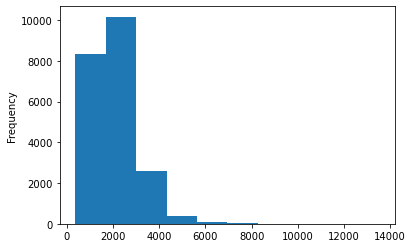

In [4]:
print(df['sqft_living'].sort_values(ascending = False))
#Those are some big results.
print(df['sqft_living'].quantile(0.99))
# even the 99 percentile is still sub 5000. 
df['sqft_living'].plot(kind = 'hist')
#Plotting this shows a bit skew right.

#It may be wise to shave the model off around there.

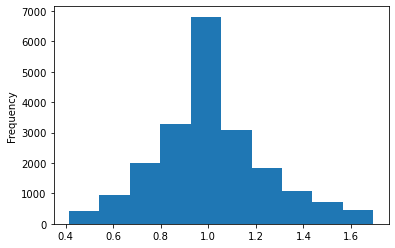

In [5]:
df.sqft_living.describe()
df['sqft_living_ratio'] = df['sqft_living'] / df['sqft_living15']
df.sqft_living_ratio.describe()

df['sqft_living_ratio'] = df.sqft_living / df.sqft_living15
df['sqft_living_ratio'] = df['sqft_living_ratio'].loc[(np.abs(stats.zscore(df.sqft_living_ratio)) < 2)]
df = df.dropna(subset = ['sqft_living_ratio'])
df.sqft_living_ratio.plot.hist();

1717     1651359
17305    1164794
7640     1074218
3945      982998
4437      982278
          ...   
21536        638
20588        635
3449         609
7582         600
5821         572
Name: sqft_lot, Length: 20621, dtype: int64
206478.8


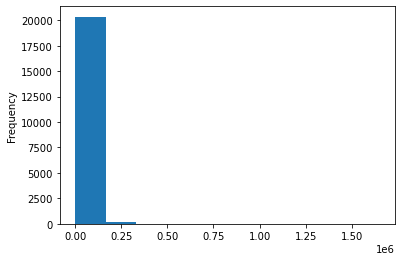

In [6]:
print(df['sqft_lot'].sort_values(ascending = False)) 
#Holy cow! I don't think those are residential sales.
print(df['sqft_lot'].quantile(0.99))
#99th quantile, still high, still well below those outliers

df['sqft_lot'].plot(kind = 'hist');
#Some weirdness at the far end

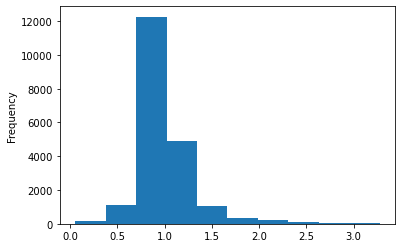

In [7]:
df.sqft_lot15.describe()
df['sqft_lot_ratio'] = df['sqft_lot'] / df['sqft_lot15']
df.sqft_lot_ratio.describe()

df['sqft_lot_ratio'] = df.sqft_lot / df.sqft_lot15
df['sqft_lot_ratio'] = df['sqft_lot_ratio'].loc[(np.abs(stats.zscore(df.sqft_lot_ratio)) < 2)]
df = df.dropna(subset = ['sqft_lot_ratio'])
df.sqft_lot_ratio.plot.hist();

In [8]:
df.bedrooms.value_counts()
df = df[df['bedrooms'] < 33]

In [9]:
df['view'] = df['view'].replace({'NONE': 0, 'AVERAGE': 1, 'GOOD': 2, 'FAIR': 3, 'EXCELLENT':4}).fillna(0)

In [10]:
df['floors'].value_counts()
#Seems reasonable. Maybe make it categorical?

1.0    10240
2.0     7673
1.5     1757
3.0      575
2.5      134
3.5        6
Name: floors, dtype: int64

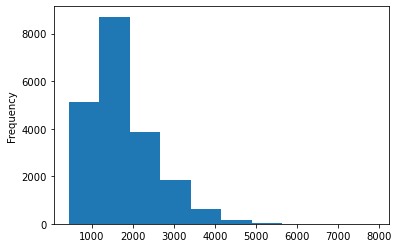

In [11]:
#cleaning the square feet above ground data
df['sqft_above'].sort_values(ascending = False) 
df['sqft_above'].quantile(.99)
#Not quite as extreme as sqft_livable


df['sqft_above'].plot(kind='hist');

In [12]:
#cleaning the basement data
df['sqft_basement'] = df['sqft_basement'].replace({'?': 0.0})
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [13]:
from statsmodels.formula.api import ols
#X = df[['bedrooms', 'bathrooms', 'sqft_living',
#       'sqft_lot', 'floors', 'waterfront', 'view',
#       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','sqft_living15', 'sqft_lot15', 'grade_num']]
#y = df.price

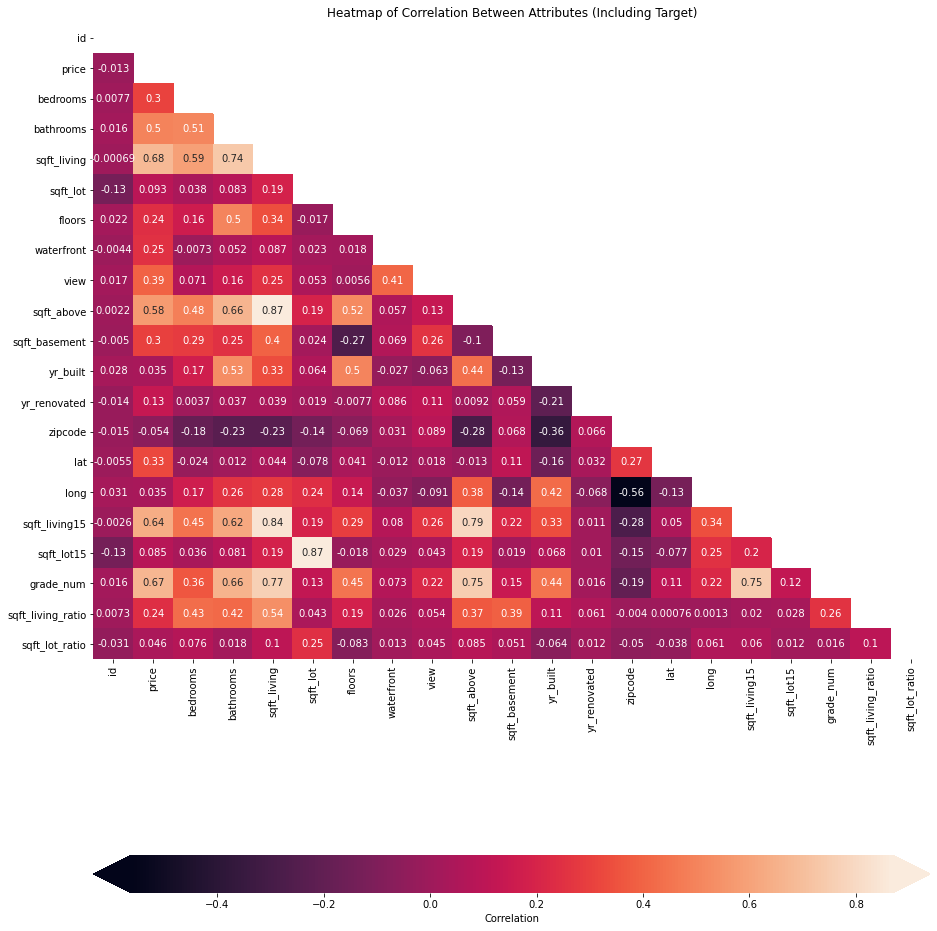

In [14]:
import seaborn as sns
import numpy as np

corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 18))
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [15]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
ohe.fit_transform(df[['zipcode']])
zip_encoded = ohe.fit_transform(df[['zipcode']])
zip_enc_df = pd.DataFrame(zip_encoded, columns=ohe.categories_[0], index=df.index)
df_original = pd.concat([df, zip_enc_df], axis=1)
ziplist = ohe.categories_[0].tolist()
zipliststr = []
for i in ziplist: 
    zipliststr.append(str(i))
zipliststr
ord_enc = OrdinalEncoder()
ord_enc.fit_transform(df[['bedrooms','bathrooms','floors','grade_num']])

array([[ 2.,  2.,  0.,  3.],
       [ 2.,  7.,  2.,  3.],
       [ 3., 10.,  0.,  3.],
       ...,
       [ 1.,  1.,  2.,  3.],
       [ 2.,  8.,  2.,  4.],
       [ 1.,  1.,  2.,  3.]])

In [16]:
X = df_original.drop(columns = ['id','date','price','lat','long','sqft_living_ratio','sqft_lot_ratio','condition','yr_built','yr_renovated','grade','zipcode'])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,df.price)

training_data = pd.concat([X_train,y_train], axis = 1)
testing_data = pd.concat([X_test,y_test], axis = 1)

In [18]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

In [19]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=training_data[['sqft_living']],
    y=training_data.price,
    return_train_score=True,
    cv=splitter
)

print("Baseline Train score:     ", baseline_scores["train_score"].mean())
print("Baseline Validation score:", baseline_scores["test_score"].mean())


Baseline Train score:      0.463436143622177
Baseline Validation score: 0.467468931850848


In [20]:
size_bed_bath = LinearRegression()

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=training_data[['sqft_living','bedrooms','bathrooms']],
    y=training_data.price,
    return_train_score=True,
    cv=splitter
)

print("Size Bedroom Bathroom Train score:", baseline_scores["train_score"].mean())
print("Size Bedroom Bathroom Test score: ", baseline_scores["test_score"].mean())


Size Bedroom Bathroom Train score: 0.4789161590868205
Size Bedroom Bathroom Test score:  0.4827372117909527


In [21]:
size_bed_bath_quality = LinearRegression()

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=training_data[['sqft_living','bedrooms','bathrooms','grade_num']],
    y=training_data.price,
    return_train_score=True,
    cv=splitter
)

print("Size Bedroom Bathroom Grade Train score:", baseline_scores["train_score"].mean())
print("Size Bedroom Bathroom Grade Test score: ", baseline_scores["test_score"].mean())


Size Bedroom Bathroom Grade Train score: 0.5240040494167673
Size Bedroom Bathroom Grade Test score:  0.5266350581839999


In [22]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=training_data.drop(columns = 'price'),
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Second Model Train score:     ", second_model_scores["train_score"].mean())
print("Second Model Validation score:", second_model_scores["test_score"].mean())


Second Model Train score:      0.8174063054862236
Second Model Validation score: 0.8034110228691361


In [23]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

X_train_for_RFECV = StandardScaler().fit_transform(X_train)
model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

RFECV(cv=ShuffleSplit(n_splits=3, random_state=0, test_size=0.25, train_size=None),
      estimator=LinearRegression())

In [24]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train,y_train)
print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

# Calculate training and test MSE

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

0.8143844178481962
0.8102759376595998
Train Root Mean Squarred Error: 141048.6173932114
Test Root Mean Squarred Error: 147088.97417025844


In [25]:
final_train = ols('y_train ~ X_train', data = training_data).fit()
#final_train.summary()

In [26]:
final_test = ols('y_test ~ X_test', testing_data).fit()
#final_test.summary()

In [27]:
Seattle_zipcodes = [98101, 98102, 98103, 98104, 98105, 
                    98106, 98107, 98108, 98109, 98112, 
                    98115, 98116, 98117, 98118, 98119, 
                    98121, 98122, 98125, 98126, 98133, 
                    98134, 98136, 98144, 98146, 98154, 
                    98164, 98174, 98177, 98178, 98195, 
                    98199 ]

df['in_Seattle'] = np.where(df['zipcode'].isin(Seattle_zipcodes),1,0)


In [28]:
X = df.drop(columns = ['id','date','price','lat','long','sqft_living_ratio','sqft_lot_ratio','condition','yr_built','yr_renovated','grade','zipcode'])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,df.price)

training_data = pd.concat([X_train,y_train], axis = 1)
testing_data = pd.concat([X_test,y_test], axis = 1)

In [30]:
baseline_scores = cross_validate(
    estimator=baseline_model,
    X=training_data[['sqft_living']],
    y=training_data.price,
    return_train_score=True,
    cv=splitter
)

print("Baseline Train score:     ", baseline_scores["train_score"].mean())
print("Baseline Validation score:", baseline_scores["test_score"].mean())

Baseline Train score:      0.46640319633006494
Baseline Validation score: 0.4694910103151269


In [31]:
size_bed_bath = LinearRegression()

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=training_data[['sqft_living','bedrooms','bathrooms']],
    y=training_data.price,
    return_train_score=True,
    cv=splitter
)

print("Size Bedroom Bathroom Train score:", baseline_scores["train_score"].mean())
print("Size Bedroom Bathroom Test score: ", baseline_scores["test_score"].mean())

Size Bedroom Bathroom Train score: 0.4811445204006595
Size Bedroom Bathroom Test score:  0.4830770446367441


In [32]:
size_bed_bath_quality = LinearRegression()

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=training_data[['sqft_living','bedrooms','bathrooms','grade_num']],
    y=training_data.price,
    return_train_score=True,
    cv=splitter
)

print("Size Bedroom Bathroom Grade Train score:", baseline_scores["train_score"].mean())
print("Size Bedroom Bathroom Grade Test score: ", baseline_scores["test_score"].mean())


Size Bedroom Bathroom Grade Train score: 0.5241185791467358
Size Bedroom Bathroom Grade Test score:  0.5265511450819009


In [33]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=training_data.drop(columns = 'price'),
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Second Model Train score:     ", second_model_scores["train_score"].mean())
print("Second Model Validation score:", second_model_scores["test_score"].mean())

Second Model Train score:      0.6360269792232566
Second Model Validation score: 0.6350173919992904


In [34]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

X_train_for_RFECV = StandardScaler().fit_transform(X_train)
model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

print("Columns Selected:")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")


Columns Selected:
bedrooms: True
bathrooms: False
sqft_living: True
sqft_lot: False
floors: True
waterfront: True
view: True
sqft_above: True
sqft_basement: True
sqft_living15: True
sqft_lot15: True
grade_num: True
in_Seattle: True


In [ ]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

# Calculate training and test MSE

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

In [35]:
ols('price ~ bedrooms + sqft_living + floors + C(waterfront)+ view + sqft_living15 + sqft_lot15 + grade_num + C(in_Seattle)', data = training_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     2966.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:48:38   Log-Likelihood:            -2.0804e+05
No. Observations:               15288   AIC:                         4.161e+05
Df Residuals:                   15278   BIC:                         4.162e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -5.46e+05   1.49e+04    -36.581      0.000   -5.75e+05   -5.17e+05
C(waterfront)[T.1]   5.62e+05    2.3e+04     24.394      0.000    5.17e+05    6.07e+05
C(in_Seattle)[T.1]  1.751e+05   3667.650     47.734      0.000    1.68e+05    1.82e+05
bedrooms           -1.872e+04   2337.506     -8.007      0.000   -2.33e+04   -1.41e+04
sqft_living          151.2397      4.252     35.567      0.000     142.905     159.575
floors             -4.438e+04   3359.919    -13.210      0.000    -5.1e+04   -3.78e+04
view                5.445e+04   2728.441     19.955      0.000    4.91e+04    5.98e+04
sqft_living15         87.4558      4.611     18.967      0.000      78.418      96.494
sqft_lot15            -0.2269      0.066     -3.429      0.001      -0.357      -0.097
grade_num           8.451e+04   2444.397     34.572      0.000    7.97e+04    8.93e+04
==============================================================================
Omnibus:                     7948.309   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           126552.297
Skew:                           2.127   Prob(JB):                         0.00
Kurtosis:                      16.438   Cond. No.                     4.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

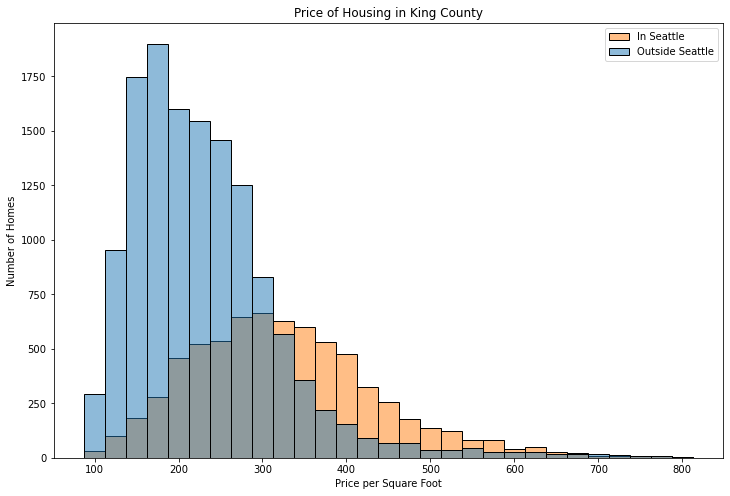

In [36]:
df['price_per_sqft'] = df['price'].div(df['sqft_living'])

fig, ax = plt.subplots(figsize = (12,8))
sns.histplot(ax=ax, data = df, x = 'price_per_sqft', hue = 'in_Seattle', binwidth = 25, alpha = .5)
ax.set_xlabel('Price per Square Foot')
ax.set_ylabel('Number of Homes')
ax.set_title('Price of Housing in King County')
ax.legend(['In Seattle','Outside Seattle']);